In [1]:
from modsim import *

In [3]:
params = Params(
    mass=0.0025, # kg
    diameter=0.019, # m
    rho=1.2, # kg/m**3
    g=9.8, # m/s**2
    v_init=0, # m / s
    v_term=18, # m / s
    height=381, # m
    t_end=30, # s
)
params

namespace(mass=0.0025,
          diameter=0.019,
          rho=1.2,
          g=9.8,
          v_init=0,
          v_term=18,
          height=381,
          t_end=30)

In [4]:
from numpy import pi
def make_system(params):
    init = State(y=params.height, v=params.v_init)
    area = pi * (params.diameter/2)**2
    C_d = (2 * params.mass * params.g / (params.rho * area * params.v_term**2))
    return System(init=init,
                  area=area,
                  C_d=C_d,
                  mass=params.mass,
                  rho=params.rho,
                  g=params.g,
                  t_end=params.t_end)

In [5]:
system = make_system(params)
system

namespace(init=y    381
               v      0
               Name: state, dtype: int64,
          area=0.0002835287369864788,
          C_d=0.4445009981135434,
          mass=0.0025,
          rho=1.2,
          g=9.8,
          t_end=30)

In [7]:
def slope_func(t, state, system):
    y, v = state
    rho, C_d, area, mass, g = system.rho, system.C_d, system.area, system.mass, system.g
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass

    dydt = v
    dvdt = -g + a_drag
    return dydt, dvdt


In [8]:
slope_func(0, system.init, system)

(0, -9.8)

In [9]:
def event_func(t, state, system):
    y, v = state
    return y

In [10]:
results, details = run_solve_ivp(system, slope_func, events=event_func)
details.message

'A termination event occurred.'

In [11]:
results.tail()

,y,v
21.541886,1.614743e+01,-18.001510
21.766281,1.211265e+01,-18.006240
21.990676,8.076745e+00,-18.009752
22.215070,4.039275e+00,-18.011553
22.439465,2.131628e-14,-18.011383


In [12]:
t_sidewalk = results.index[-1]
t_sidewalk

np.float64(22.439465058044306)

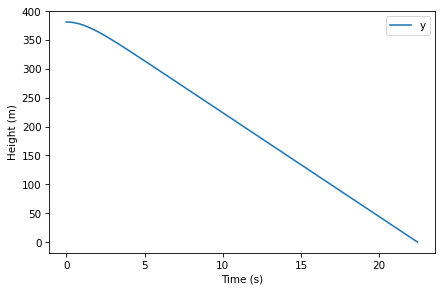

In [21]:
def plot_position(results):
    results.y.plot()
    decorate(xlabel='Time (s)',
            ylabel='Height (m)')
plot_position(results)

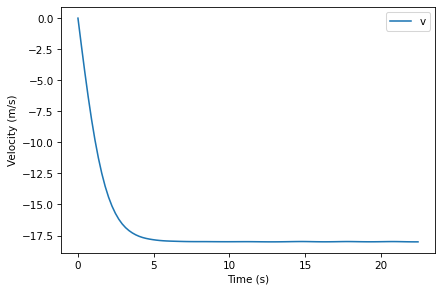

In [20]:
def plot_velocity(results):
    results.v.plot()
    decorate(xlabel='Time (s)', ylabel='Velocity (m/s)')
plot_velocity(results)

In [ ]:
# Exercise 21.1
# Run the simulation with a downward initial velocity that exceeds the penny’s terminal velocity.
# What do you expect to happen? Plot velocity and position as a function of time,
# and see if they are consistent with your prediction.
# Hint: Use params.set to make a new Params object with a different initial velocity.


In [32]:
params2 = params.set(v_init=-20)
system2 = make_system(params2)
params2, system2

(namespace(mass=0.0025,
           diameter=0.019,
           rho=1.2,
           g=9.8,
           v_init=-20,
           v_term=18,
           height=381,
           t_end=30),
 namespace(init=y    381
                v    -20
                Name: state, dtype: int64,
           area=0.0002835287369864788,
           C_d=0.4445009981135434,
           mass=0.0025,
           rho=1.2,
           g=9.8,
           t_end=30))

In [35]:
results, details = run_solve_ivp(system2, slope_func, events=event_func)
details.message

'A termination event occurred.'

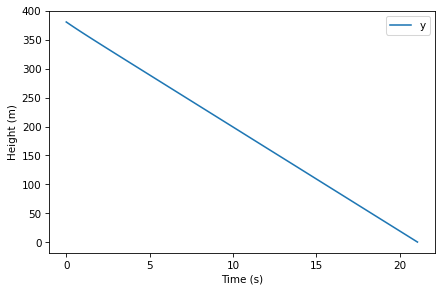

In [37]:
plot_position(results)

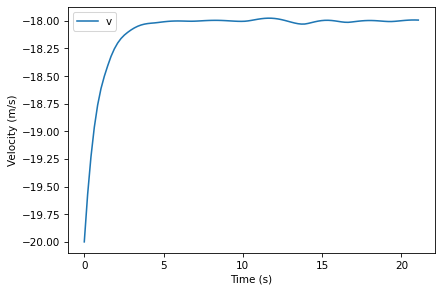

In [36]:
plot_velocity(results)

In [ ]:
# Exercise 21.2
# Suppose we drop a quarter from the Empire State Building and find that 
# its flight time is 19.1 seconds. Use this measurement to estimate terminal velocity 
# and coefficient of drag.
# You can get the relevant dimensions of a quarter from 
# https://en.wikipedia.org/wiki/Quarter_(United_States_coin).
# 
# 1. Create a Params object with new values of mass and diameter. 
# We don’t know v_term, so we’ll start with the initial guess 18 m/s.
# 
# 2. Use make_system to create a System object.
# 
# 3. Call run_solve_ivp to simulate the system. How does the flight time of the simulation 
# compare to the measurement?
# 
# 4. Try a few different values of v_term and see if you can get the simulated flight time 
# close to 19.1 seconds.
# 
# 5. Optionally, write an error function and use root_scalar to improve your estimate.
# 
# 6. Use your best estimate of v_term to compute C_d.
# 
# Note: I fabricated the “observed” flight time, so don’t take the results of this exercise 
# too seriously.

In [38]:
params3 = Params(
    mass=0.00567, # kg
    diameter=0.024, # m
    rho=1.2, # kg/m**3
    g=9.8, # m/s**2
    v_init=0, # m / s
    v_term=18, # m / s
    height=381, # m
    t_end=30, # s
)
params3

namespace(mass=0.00567,
          diameter=0.024,
          rho=1.2,
          g=9.8,
          v_init=0,
          v_term=18,
          height=381,
          t_end=30)

In [39]:
system3 = make_system(params3)
system3

namespace(init=y    381
               v      0
               Name: state, dtype: int64,
          area=0.0004523893421169302,
          C_d=0.6318303875060197,
          mass=0.00567,
          rho=1.2,
          g=9.8,
          t_end=30)

In [40]:
results, details = run_solve_ivp(system3, slope_func, events=event_func)
details.message

'A termination event occurred.'

In [43]:
t_sidewalk = results.index[-1]
t_sidewalk

np.float64(22.439465058044302)

In [56]:
params3x = params3.set(v_term=22)
system3x = make_system(params3x)
results, details = run_solve_ivp(system3x, slope_func, events=event_func)
details.message, results.index[-1]

('A termination event occurred.', np.float64(18.87282979155261))

In [60]:
def error_func(v_term, system):
    params_x = params3.set(v_term=v_term)
    system_x = make_system(params_x)
    results, details = run_solve_ivp(system_x, slope_func, events=event_func)
    t_sidewalk = results.index[-1]
    return t_sidewalk - 19.1
error_func(18, system3), error_func(22, system3)

(np.float64(3.3394650580443006), np.float64(-0.2271702084473901))

In [62]:
res = root_scalar(error_func, system3, bracket=[18, 22])
res.root

21.688258716910184

In [63]:
params3x = params3.set(v_term=res.root)
system3x = make_system(params3x)
results, details = run_solve_ivp(system3x, slope_func, events=event_func)
details.message, results.index[-1]

('A termination event occurred.', np.float64(19.100105371017516))

In [64]:
results

,y,v
0.000000,3.810000e+02,0.000000
0.191001,3.808214e+02,-1.867241
0.382002,3.802882e+02,-3.707121
0.573003,3.794086e+02,-5.493280
0.764004,3.781951e+02,-7.203146
...,...,...
18.336101,1.655627e+01,-21.683744
18.527102,1.241810e+01,-21.687652
18.718103,8.279515e+00,-21.691184
18.909104,4.140220e+00,-21.694077


In [65]:
res

      converged: True
           flag: converged
 function_calls: 5
     iterations: 4
           root: 21.688258716910184
         method: brentq

In [66]:
system.init

y    381
v      0
Name: state, dtype: int64